# Data Science & Business Analytics Task-1

## Author: Saloni Patadia

### Topic: Prediction Using Supervised ML

### Task-1: Predict the percentage of an student based on the number of hours they studied.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
X = df['Hours'].values
Y= df['Scores'].values


In [5]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:, -1]

y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:, -1]

In [6]:
# This is the error function to prevent overfitting.
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) -t) **2)
    return e + 1/(2 * N)
    

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

In [8]:
# This function is to update the coefficients of Linear Regression throughout the iterations of training.
def update(m,x,c,t, learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

In [9]:
# This function will determine by how much our values  need to get updated.
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('Error less than error threshold, stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values
    

In [10]:
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 1500
error_threshold = 0.001


m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)


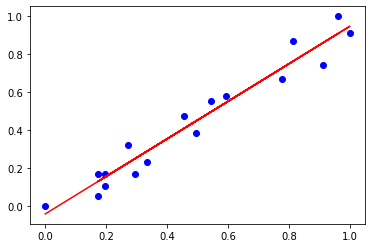

In [11]:
plt.scatter(xtrain, ytrain, color = 'b')
plt.plot(xtrain, (m * xtrain + c), color = 'r')

Text(0.5, 0, 'Iterations')

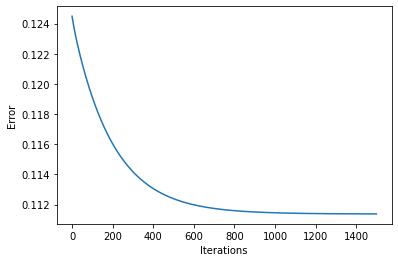

In [12]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [13]:
predicted = (m*xtest)+c
mean_squared_error(ytest,predicted)

0.004936782445148334

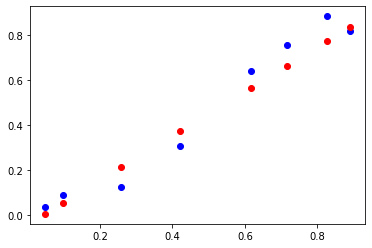

In [14]:
plt.scatter(xtest,ytest,color='b')
plt.scatter(xtest,predicted,color='r')

In [15]:
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)


xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]


p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns=['x','target_y','predicted_y'])
p = p.round(decimals = 2)
p.head()


,x,target_y,predicted_y
0,1.5,20.0,17.50
1,6.9,76.0,68.93
2,7.8,86.0,77.50
3,3.2,27.0,33.69
4,1.9,24.0,21.31


In [16]:
def final_predict(m, c, x):
    return (m*x)+c

In [17]:
m = np.array(m)     
c = np.array(c)  

In [18]:
M = x_scaler.inverse_transform(m.reshape(1, -1))
C = x_scaler.inverse_transform(c.reshape(1, -1))

In [19]:
final_predict(M, C, 9.25)

array([[85.02719238]])